<a href="https://colab.research.google.com/github/FANG87003/2025_ML_hws/blob/main/hw4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 4-2

## 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from ipywidgets import interact_manual

## 顯示中文

In [3]:
# 下載思源黑體字型（支援中文）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 重新載入字型
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

## 一、資料預處理

In [4]:
# 下載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
# 顯示資料形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 資料常模化 (normalization)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

### One-hot encoding

In [7]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### 顯示三張訓練圖片與真實標籤

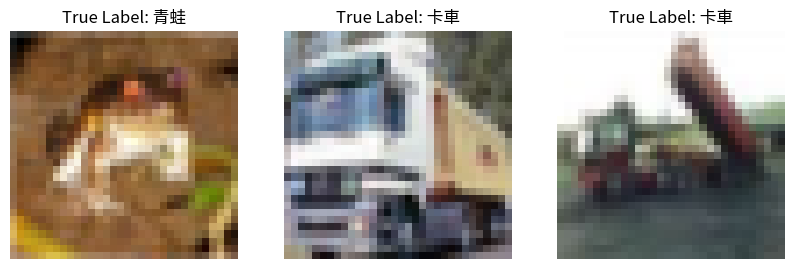

In [8]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"True Label: {class_name[y_train[i].item()]}")
    plt.axis('off')
plt.show()

## 二、建立神經網路模型

In [9]:
model = Sequential()

### 第01層：卷積層 (32 個 Filter，大小為 5x5)
* 圖片尺寸為	32x32
* 彩色圖片	3 通道（RGB）
* (32, 32, 32)
* 卷積層參數 = (Filter高 × Filter寬 × 前層輸入通道數 + 偏值) × 本層通道數





In [10]:
model.add(Conv2D(32, (5,5), padding='same',
        input_shape=(32,32,3),
        activation='relu'))  # (5x5x3+1)x32 = 2432

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 第02層：Dropout 0.25

In [11]:
model.add(Dropout(0.25))

### 第03層：池化層
* (32, 32, 32) → (16, 16, 32)
* 保留前一層 32 個通道

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第04層：卷積層 (64 個 Filter，大小為 3x3)
* 圖片尺寸為	16x16
* (16, 16, 64)
* 前一層輸出 32 個通道
* 本層 64 通道

In [13]:
model.add(Conv2D(64, (3,3), padding='same',
        activation='relu',))  # (3x3x32+1)x64 = 18496

### 第05層：Dropout 0.25

In [14]:
model.add(Dropout(0.25))

### 第06層：池化層
* (16, 16, 64) → (8, 8, 64)
* 保留前一層 64 個通道

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第07層：拉平層
* (8, 8, 64) → 4096

In [16]:
model.add(Flatten())

### 第08層：Dropout 0.25

In [17]:
model.add(Dropout(0.25))

### 第09層：全連接層 (1024 個神經元)
* 1024 個神經元對應 CIFAR-10 的 10 類別
* 每個神經元連接前一層的 4096 個輸入，共有 4194304 個權重 + 1024 個偏值 = 4195328 個參數。

In [18]:
model.add(Dense(1024, activation='relu')) # 4096x1024+1024 = 4195328

### 第10層：Dropout 0.25

In [19]:
model.add(Dropout(0.25))

### 第11層：全連接層 (10 個神經元)

In [20]:
model.add(Dense(10, activation='softmax')) # 1024x10+10 = 10250

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,226,506 (16.12 MB)

 Trainable params: 4,226,506 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

## 三、訓練神經網路模型

In [22]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [23]:
train_history = model.fit(
    x_train, y_train_oh,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    verbose=2)

Epoch 1/20
313/313 - 15s - 47ms/step - accuracy: 0.4246 - loss: 1.5937 - val_accuracy: 0.5208 - val_loss: 1.4076
Epoch 2/20
313/313 - 2s - 8ms/step - accuracy: 0.5630 - loss: 1.2294 - val_accuracy: 0.5824 - val_loss: 1.2137
Epoch 3/20
313/313 - 3s - 8ms/step - accuracy: 0.6179 - loss: 1.0804 - val_accuracy: 0.6386 - val_loss: 1.1350
Epoch 4/20
313/313 - 5s - 16ms/step - accuracy: 0.6639 - loss: 0.9557 - val_accuracy: 0.6637 - val_loss: 1.0348
Epoch 5/20
313/313 - 2s - 8ms/step - accuracy: 0.6952 - loss: 0.8667 - val_accuracy: 0.6692 - val_loss: 0.9969
Epoch 6/20
313/313 - 2s - 8ms/step - accuracy: 0.7289 - loss: 0.7729 - val_accuracy: 0.6994 - val_loss: 0.9064
Epoch 7/20
313/313 - 2s - 8ms/step - accuracy: 0.7584 - loss: 0.6884 - val_accuracy: 0.7011 - val_loss: 0.8832
Epoch 8/20
313/313 - 2s - 8ms/step - accuracy: 0.7834 - loss: 0.6192 - val_accuracy: 0.7136 - val_loss: 0.8462
Epoch 9/20
313/313 - 2s - 7ms/step - accuracy: 0.8085 - loss: 0.5398 - val_accuracy: 0.7133 - val_loss: 0.838

## 四、顯示 loss & accuracy 折線圖

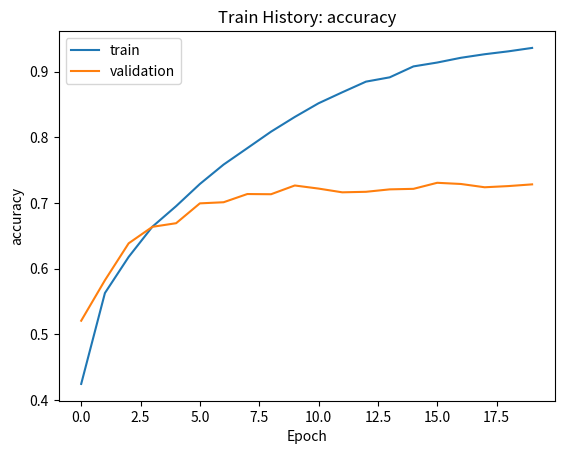

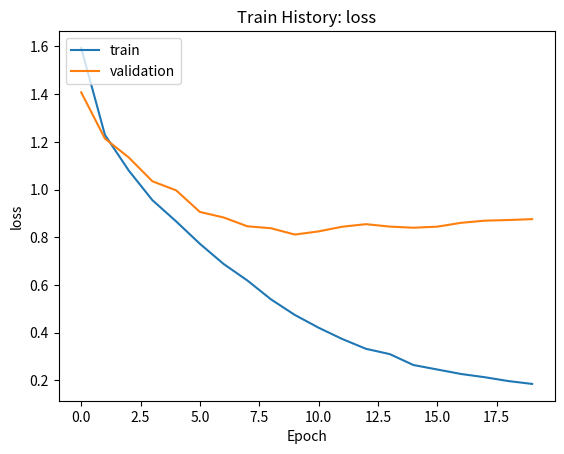

In [24]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {train}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## 五、評估模型準確率

In [25]:
scores = model.evaluate(x_test, y_test_oh)
print(f"accuracy: {scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7252 - loss: 0.8852
accuracy: 72.36%


## 六、預測

In [26]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
predictions.shape

(10000, 10)

In [28]:
predictions

array([[1.4604344e-03, 1.6718609e-02, 2.1766214e-02, ..., 4.9065785e-03,
        3.1496156e-02, 1.4665622e-03],
       [3.0443621e-06, 2.6833501e-02, 5.9522991e-14, ..., 1.8190346e-16,
        9.7316206e-01, 1.4040700e-06],
       [1.5738457e-01, 2.0826535e-02, 1.6208874e-03, ..., 4.8657556e-04,
        8.0731916e-01, 5.5145603e-03],
       ...,
       [3.0009843e-07, 1.3522594e-08, 2.1913394e-02, ..., 1.4244512e-04,
        2.6403082e-08, 2.6742662e-06],
       [5.6624808e-04, 8.8330173e-01, 2.7201665e-03, ..., 4.0587838e-06,
        8.8242133e-04, 3.6119577e-06],
       [6.7158089e-12, 5.0558641e-10, 4.5165361e-08, ..., 9.9979585e-01,
        2.7907810e-11, 1.5655281e-11]], dtype=float32)

In [29]:
predicted_classes = np.argmax(predictions, axis=1)

## 七、顯示圖片與標籤名稱

In [30]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, true_labels, pred_labels, label_names, idx, num):
  plt.figure(figsize=(6, 7))
  if num > 25: num = 25
  for i in range(num):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx + i])

    true_idx = np.squeeze(true_labels[idx + i])
    pred_idx = np.squeeze(pred_labels[idx + i])

    true_name = label_names[true_idx]
    pred_name = label_names[pred_idx]

    plt.title(f'True: {true_name}\nPred: {pred_name}', fontsize=10)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

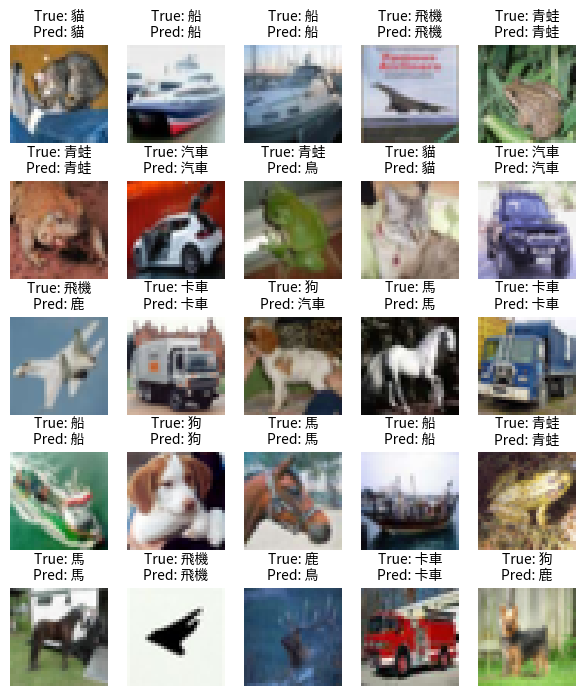

In [31]:
plot_images_labels_prediction(x_test, y_test, predicted_classes, class_name, idx=0, num=25)

## 八、混淆矩陣 (Confusion Matrix)

In [32]:
import pandas as pd

pd.crosstab(np.squeeze(y_test), predicted_classes, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,736,16,69,13,17,3,17,6,85,38
1,16,810,6,9,3,3,12,3,40,98
2,46,3,648,56,90,28,76,30,17,6
3,26,14,92,485,90,131,102,30,16,14
4,15,2,63,40,732,18,64,49,15,2
5,15,6,58,172,60,557,56,62,9,5
6,6,5,34,37,47,18,839,5,7,2
7,10,2,32,30,83,31,16,781,2,13
8,35,29,21,11,15,6,10,1,853,19


## 九、儲存完整模型

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [35]:
model.save('cnn_cifar10_model.keras')

## 十、interact_manual

神經網路判斷為： 貓
正確答案為： 貓


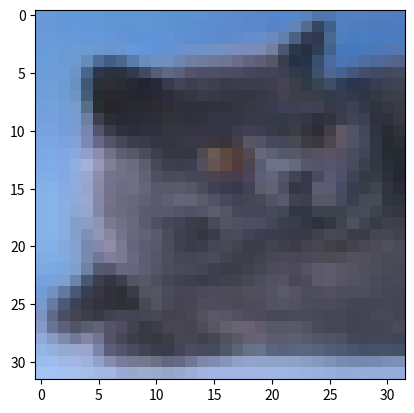

In [36]:
def test(測試編號):
  plt.imshow(x_test[測試編號], cmap='Greys')
  print('神經網路判斷為：', class_name[predicted_classes[測試編號]])
  print('正確答案為：', class_name[np.squeeze(y_test[測試編號])])

#interact_manual(test, 測試編號=(0, len(x_test)-1))
test(7014)